# `Time Series Analysis` 

### Chapter 03: White Noise and Random Walk

#### `01-Plotting Time Series`

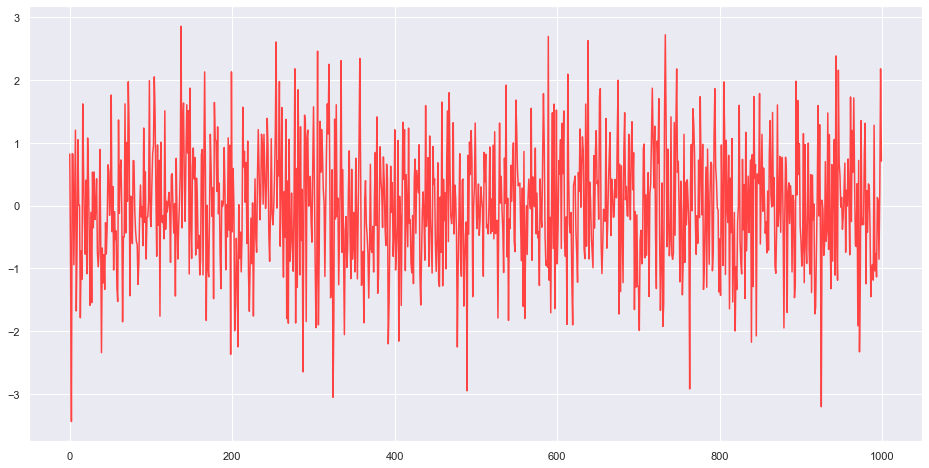

In [44]:
# استيراد المكتبات
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

#  بيانات عشوائية لسلسلة زمنية عبارة عن تشويش أبيض
white_noise = np.random.randn(1000)
time = np.arange(len(white_noise))

# تفضيلات نمط التصوير البياني
sns.set_style("dark")
sns.set(color_codes=True)

# تهيئة التصوير البياني و أبعاده
ax, fig = plt.subplots(figsize=(16,8))

# تصوير السلسلة الزمنية
sns.lineplot(x=time, y=white_noise,
             color='#FF4343')
plt.show()

#### `02- Time series chunks comparison in terms of mean and std`

In [45]:
# تقسيم السلسلة إلى 20 جزء عشوائي بالتساوي زمنياً 
white_noise_chunks = np.split(white_noise, 20)


# حساب المتوسط الحسابي و الانحراف المعياري لكل جزء
means, stds = [], []

for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))

# طباعة جميع المتوسطات والانحرافات المعيارية للمقارنة
print(f"means: {means}")
print("---" * 50)
print(f"standard deviations: {stds}")

means: [-0.3226066242147003, -0.011792331583367415, 0.2896222419956448, 0.06495157993212479, -0.11153145946511281, 0.10229155322429097, -0.048371974187639694, -0.22173699190865753, -0.08413610478766677, -0.12839281510360837, 0.02497597595402373, -0.00402989512755739, 0.10398486257908454, 0.1296006243919019, 0.0775582632230018, 0.0004004924025023504, -0.10564628452512234, 0.07410051412188012, -0.13691063935928136, -0.04929456377810484]
------------------------------------------------------------------------------------------------------------------------------------------------------
standard deviations: [0.9802453802713381, 0.8818232567688036, 0.9227730521595355, 0.9693912632841657, 0.9103952734555938, 1.1397237457347995, 1.2181321157122218, 0.8810961864064304, 0.8623375895454919, 0.993298836304515, 0.7567098928181446, 0.9776256524615244, 0.9585904116088382, 0.8957162071930785, 1.1217371814973278, 0.9331595604663834, 1.0544860076628015, 0.8476480342867194, 1.0629711553872747, 0.9500699

#### `03- Chunks mean and std visualization`

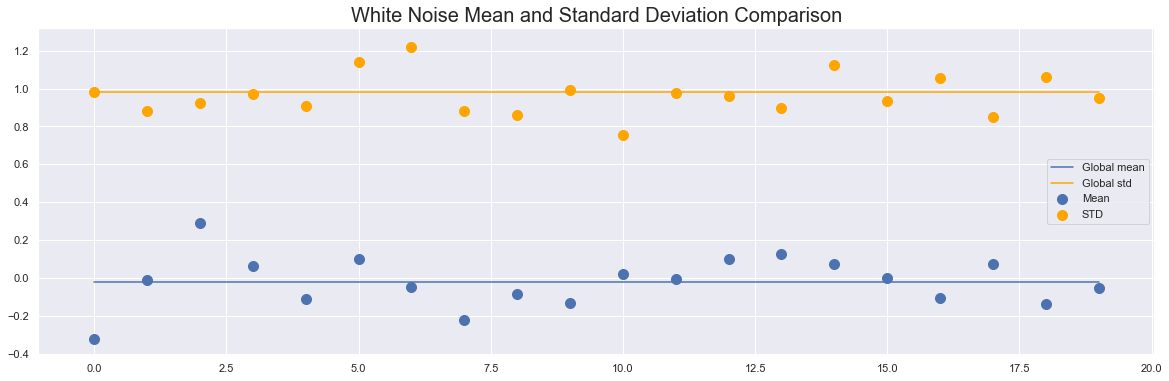

In [46]:

# مقارنة المتوسطات الحسابية والانحرافات المعيارية للسلسلة الزمنية 

mean_time_axis = np.arange(len(means))
std_time_axis = np.arange(len(stds))

# تفضيلات التصوير البياني
plt.rcParams["figure.figsize"] = (20,6)
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)

# الرسم البياني للمتوسط العام للسلسلة الزمنية
plt.plot(mean_time_axis, [white_noise.mean()] * len(means), 
         label='Global mean', lw=1.5)
# الرسم البياني للمتوسطات الحسابية للأجزاء المقطعة
plt.scatter(mean_time_axis, y=means, label='Mean', s=100)

# الرسم البياني للانحراف المعياري العام للسلسلة الزمنية
plt.plot(std_time_axis, [white_noise.std()] * len(stds),
         label='Global std', lw=1.5, color='orange')
# الرسم البياني للانحراف المعياري للأجزاء المقطعة
plt.scatter(std_time_axis, y=stds, label='STD', color='orange', s=100)

plt.legend();

#### `04- Autocorrelation plots`

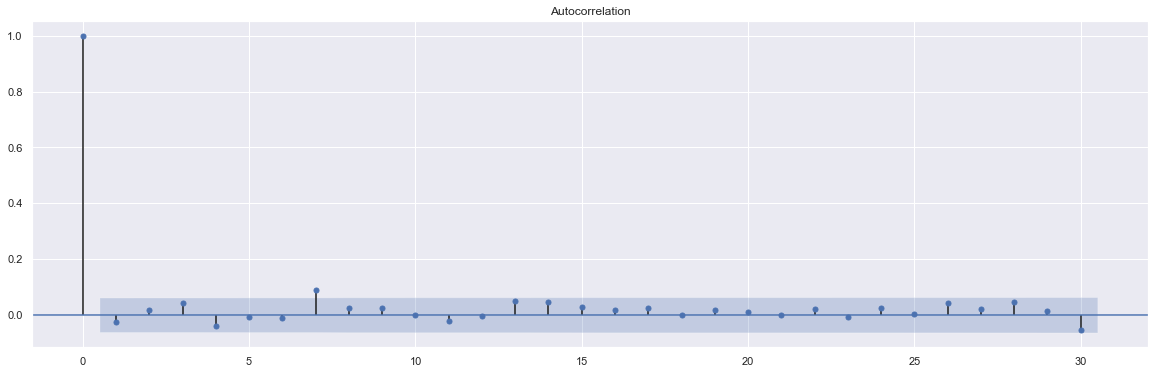

In [47]:
# استيراد المكتبات
import numpy as np 
import statsmodels.api as sm

# هذه الدالة مسؤولة عن تثبيت توليد النتائج العشوائية
np.random.seed(0)

# سلسلة زمنية تمثل تشويش أبيض
white_noise = np.random.randn(1000)

# مخطط الارتباط التلقائي 
sm.graphics.tsa.plot_acf(np.array(white_noise))
plt.show()


#### `05- Random Walk`

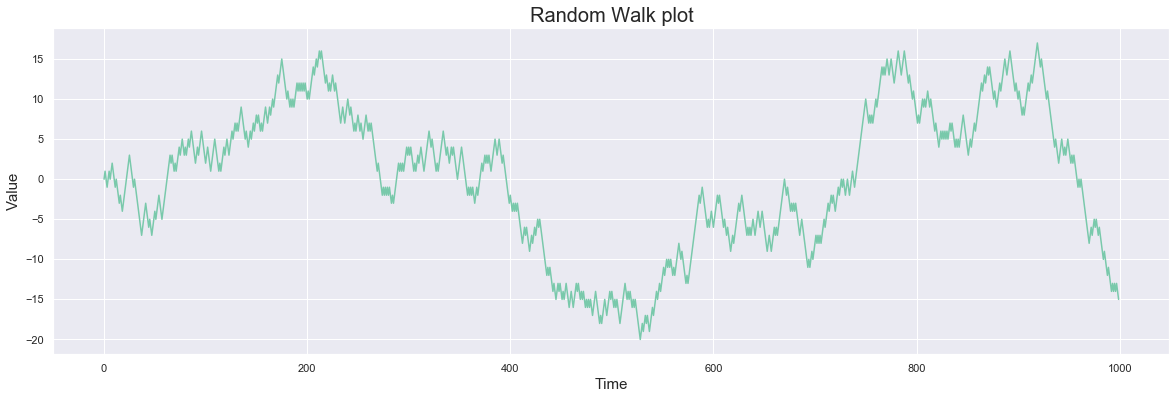

In [80]:
# كما أشرنا سابقًا سنبدأ السلسلة بقيمة صفر
random_walk = [0]

np.random.seed(123)


for i in range(1, 1000):
    # اتجاه التحرك في السلسلة يعتمد على الرقم العشوائي المضاف 
    if np.random.random() > 0.5:
        num = 1    
    else:
        num = -1

    random_walk.append(random_walk[-1] + num)
    
# تصوير السلسلة الزمنية
g = sns.lineplot(x=np.arange(len(random_walk)), y=random_walk,
             color='#79C9AB')

g.set_title("Random Walk plot", fontsize=20)
g.set_xlabel('Time', fontsize=15)
g.set_ylabel('Value', fontsize=15)
plt.show()

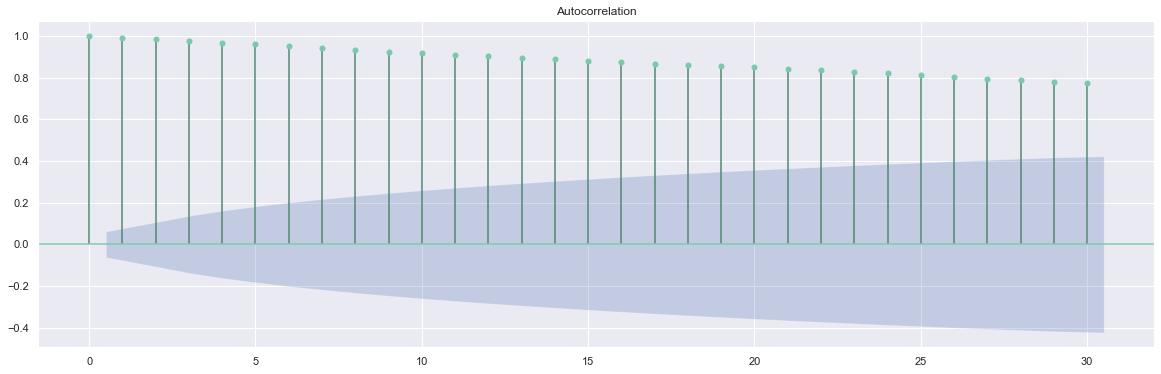

In [90]:
sm.graphics.tsa.plot_acf(np.array(random_walk), color='#79C9AB',  
                         vlines_kwargs={"colors": '#508672'})
plt.show()

#### `06- Random walk plot first-order difference`

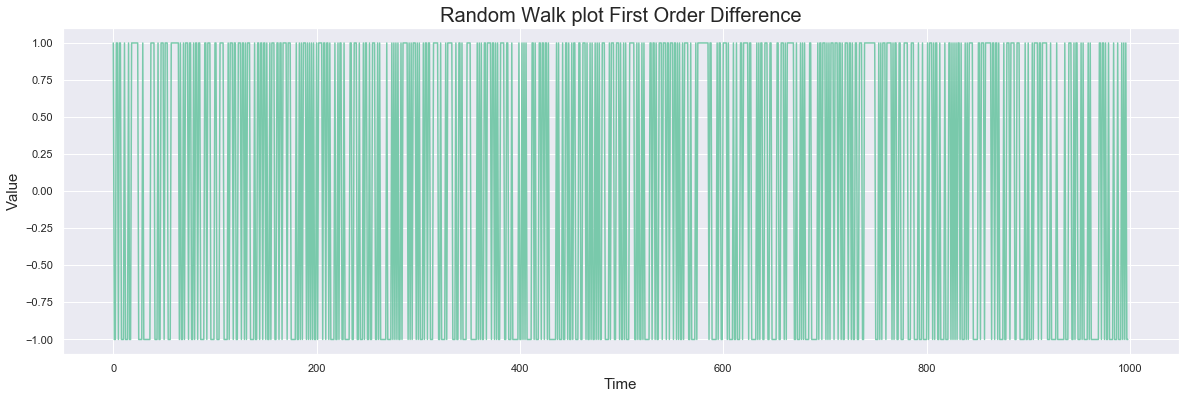

In [104]:
# استيراد المكتبات
import pandas as pd

# First-order difference | احتساب فرق الرتبة الأولى
s_random_walk = pd.Series(random_walk)
s_random_walk_diff = s_random_walk.diff(1).dropna()

# تصويرالبيانات
g = sns.lineplot(x=np.arange(len(s_random_walk_diff)), y=s_random_walk_diff,
                 color='#79C9AB')

g.set_title("Random Walk plot First Order Difference", fontsize=20)
g.set_xlabel('Time', fontsize=15)
g.set_ylabel('Value', fontsize=15)
plt.show()

#### `07- Autocorrelation Random walk first-order difference`

In [107]:
s_random_walk_diff.unique()

array([ 1., -1.])

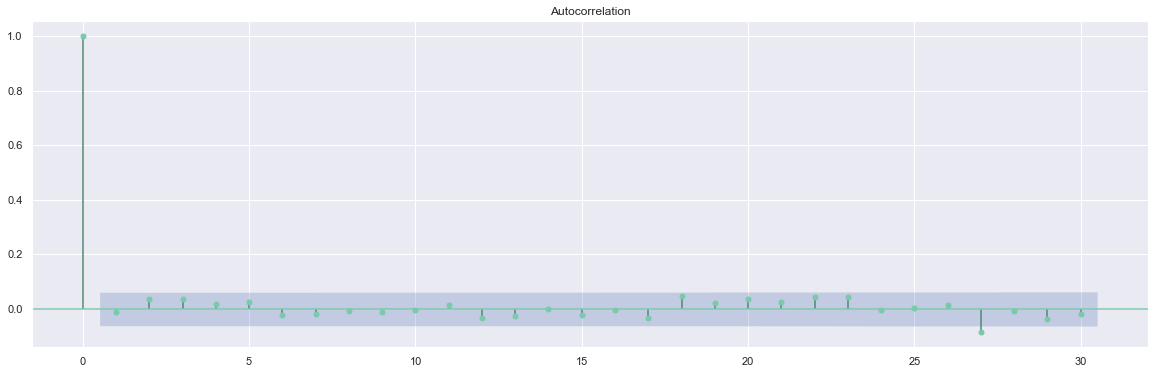

In [109]:
sm.graphics.tsa.plot_acf(np.array(s_random_walk_diff), color='#79C9AB',  
                         vlines_kwargs={"colors": '#508672'})
plt.show()